In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Data Extraction

In [4]:
import json

# Specify the correct encoding (if known) when opening the JSON file
with open("Text Classification/intents.json", encoding='utf-8') as f:
    # Read each line as a separate JSON object
    lines = f.readlines()

# Load JSON data from each line and store in a list
data = []
for line in lines:
    try:
        json_object = json.loads(line)
        data.append(json_object)
    except json.JSONDecodeError:
        # Handle decoding errors if needed
        pass

# Convert the data to a DataFrame if needed
import pandas as pd

df = pd.DataFrame(data)

# Now you can work with the DataFrame 'df'



In [5]:
df_original=df.copy()

In [6]:
df.head()

,id,user_id,tags,intents,answer
0,7544,4450,"[pause, timescale]","[How can I pause my game?, What is the best wa...","In the Editor, you can just click the pause bu..."
1,7561,3146,"[iphone, upload, appstore]",[How do I upload my iPhone app to the app stor...,Log into Apple's developer portal and click th...
2,7572,142,"[debug, debugger]",[Is there a way to attach a debugger to the co...,You can attach the debugger to the editor proc...
3,7599,1213,"[editor, editor-launch-fail, editor-crash]","[Why project indefinitely loads when opened?, ...","To attempt to solve the editor crash, create a..."
4,7626,2218,"[animation, import, maya]",[How can I make animations snap to a frame in ...,Set the time of AnimationState of the relevant...


In [7]:
df.dtypes

id          int64
user_id     int64
tags       object
intents    object
answer     object
dtype: object

In [8]:
df.columns

Index(['id', 'user_id', 'tags', 'intents', 'answer'], dtype='object')

# Data Validation and cleansing

In [9]:
df['tags'].unique

<bound method Series.unique of 0                                [pause, timescale]
1                        [iphone, upload, appstore]
2                                 [debug, debugger]
3        [editor, editor-launch-fail, editor-crash]
4                         [animation, import, maya]
                            ...                    
12265                                       [array]
12266              [editor, prefab, asset, preview]
12267                        [editor, installation]
12268          [c#, unity 5, array, startcoroutine]
12269                             [vector graphics]
Name: tags, Length: 12270, dtype: object>

In [10]:
df['tags'][1]

['iphone', 'upload', 'appstore']

In [14]:
df['intents'][1]

['How do I upload my iPhone app to the app store?',
 'I would like to upload my iPhone app to the App Store, but how do I do that?',
 'What is the process for uploading an iPhone app to the App Store?',
 'Can you tell me how I can upload my iPhone app to the Apple App Store?',
 'What is the best way to upload my app to the iTunes store for my iPhone?',
 'In order to upload my iPhone application to the app store, what steps should I take?',
 'I would like to upload my iPhone app to the App Store, but I am not sure how to do it.',
 'In order to have my iPhone app uploaded to the App Store, how do I do that?',
 'Where can I upload my iPhone app to the app store so that users can download it?',
 'If I want to upload my iPhone app to the iTunes store, what should I do?',
 'Would you please tell me how to upload my iPhone app to the app store?']

In [15]:
df.drop(columns=['id','user_id'],inplace=True)
df.head()

KeyError: "['id', 'user_id'] not found in axis"

In [16]:
df_exploded = df.explode('intents')
df_exploded.head()


,tags,intents,answer
0,"[pause, timescale]",How can I pause my game?,"In the Editor, you can just click the pause bu..."
0,"[pause, timescale]",What is the best way to pause my game?,"In the Editor, you can just click the pause bu..."
0,"[pause, timescale]","When I play a game, how do I pause it?","In the Editor, you can just click the pause bu..."
0,"[pause, timescale]",Could you please tell me how I can pause my game?,"In the Editor, you can just click the pause bu..."
0,"[pause, timescale]","In order to pause my game, what should I do?","In the Editor, you can just click the pause bu..."


In [18]:
df_exploded['tags'].value_counts()

[]                                                          2674
[c#]                                                        1787
[scripting problem]                                          581
[animation]                                                  566
[unity 5]                                                    385
                                                            ... 
[editor, serialization, collections]                           2
[webrequest, encoding]                                         1
[c#, pathfinding, offset, astar, nodes]                        1
[error, array, list, gameobject.find, unexpected-symbol]       1
[get, compare]                                                 1
Name: tags, Length: 10042, dtype: int64

In [13]:
df_exploded.shape

(134183, 3)

# Checking null values

In [19]:
 # Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 tags       0
intents    0
answer     0
dtype: int64


# Checking Duplicates

In [15]:
df_exploded['tags']=df_exploded['tags'].apply(lambda x : ",".join(x))
df_exploded.duplicated().sum()

0

In [16]:
df_exploded['tags'].tail(20)

12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12268    c#,unity 5,array,startcoroutine
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
12269                    vector graphics
Name: tags, dtype: object

In [17]:
df_exploded['tags'].nunique(20)


10042

In [18]:
df_exploded.shape

(134183, 3)

In [19]:
df_exploded = df_exploded.sample(frac=0.008, random_state=42)
df_exploded.shape


(1073, 3)

# Preprocessing Data

In [20]:
df_exploded.head()

,tags,intents,answer
1541,"raycasting,layermask,guiwindow",It is possible to make more than one informati...,Make multiple GUI elements.
10552,c#,How can I integrate Discord Rich Presence into...,Add a script tag to your page.
111,"car,control",In order to make my car accelerate more gradua...,Try lowering Torque property of the car.
10395,"mesh,procedural mesh,mesh vertices",Is there a reason why my lighting is uneven wh...,The vertices are not perfectly aligned
4290,animation,What do you need to do in order for Unity to k...,Use the [Animation Events](http://docs.unity3d...


In [21]:
import re  # Import the 're' module for regular expressions


In [22]:
# Convert 'tags' column to string representation
# df_exploded['tags'] = df_exploded['tags'].apply(lambda tags: ','.join(tags))

# Basic Preprocessing

In [20]:
import pandas as pd
import re

def preprocessing_pipeline(text: str, keep_code=False, keep_user=False) -> str:
    code_token = '[CODE]' if keep_code else ''
    user_token = '[USER]' if keep_user else ''
    
    steps = [
        lambda text: text.lower(),
        lambda text: re.sub(r'\{[^}]*\}', f' {code_token} ', text),
        lambda text: re.sub(r'@[\w_]+', f' {user_token} ', text),
        lambda text: re.sub(r'#(\w+)', r'\1', text),
        lambda text: re.sub(r'[\n\r\t]', ' ', text),
        lambda text: re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text),
        lambda text: re.sub(r'[^\x00-\x7F]+', ' ', text),
        lambda text: re.sub(r'\w*\d\w*', '', text),
        lambda text: re.sub(r'\s+', ' ', text),
        lambda text: text.strip()
    ]
    
    for step in steps:
        text = step(text)
        
    return text



# Apply the preprocessing pipeline
df_exploded['question'] = df_exploded['intents'].apply(preprocessing_pipeline)
df_exploded['answer'] = df_exploded['answer'].apply(preprocessing_pipeline)

print(df_exploded)


                     tags                                            intents  \
0      [pause, timescale]                           How can I pause my game?   
0      [pause, timescale]             What is the best way to pause my game?   
0      [pause, timescale]             When I play a game, how do I pause it?   
0      [pause, timescale]  Could you please tell me how I can pause my game?   
0      [pause, timescale]       In order to pause my game, what should I do?   
...                   ...                                                ...   
12269   [vector graphics]  If I want to improve the quality of an SVG fil...   
12269   [vector graphics]  Is there a way to improve the quality of an SV...   
12269   [vector graphics]  Can you please tell me what can be done to imp...   
12269   [vector graphics]  What should I do in order to improve the quali...   
12269   [vector graphics]  Could you please let me know how I can improve...   

                                       

In [21]:
df_exploded.head()

,tags,intents,answer,question
0,"[pause, timescale]",How can I pause my game?,"in the editor, you can just click the pause bu...",how can i pause my game?
0,"[pause, timescale]",What is the best way to pause my game?,"in the editor, you can just click the pause bu...",what is the best way to pause my game?
0,"[pause, timescale]","When I play a game, how do I pause it?","in the editor, you can just click the pause bu...","when i play a game, how do i pause it?"
0,"[pause, timescale]",Could you please tell me how I can pause my game?,"in the editor, you can just click the pause bu...",could you please tell me how i can pause my game?
0,"[pause, timescale]","In order to pause my game, what should I do?","in the editor, you can just click the pause bu...","in order to pause my game, what should i do?"


In [23]:
df_exploded.drop(columns='intents',axis=1,inplace=True)

# Visualizing Relationships

# Plotting top 10 most frequently used tags

In [24]:
# Plot top N frequent words in tags
top_words = 10
tags_words = ' '.join(df_exploded['tags']).split()
word_counts = pd.Series(tags_words).value_counts().head(top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=word_counts.values, y=word_counts.index)
plt.title(f'Top {top_words} Frequent Words in Tags')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


TypeError: sequence item 0: expected str instance, list found

In [25]:
# df['answer_length'] = df_exploded['answer'].apply(len)
# correlation_matrix = df_exploded[['intent_length', 'answer_length', 'tags']].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap')
# plt.show()


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Visualizing high frequency words in all the three columns

In [29]:
df_exploded.head()

,tags,answer,question
1541,"raycasting,layermask,guiwindow",make multiple gui elements.,it is possible to make more than one informati...
10552,c#,add a script tag to your page.,how can i integrate discord rich presence into...
111,"car,control",try lowering torque property of the car.,in order to make my car accelerate more gradua...
10395,"mesh,procedural mesh,mesh vertices",the vertices are not perfectly aligned,is there a reason why my lighting is uneven wh...
4290,animation,use the [animation events](http://docs..com/do...,what do you need to do in order for unity to k...


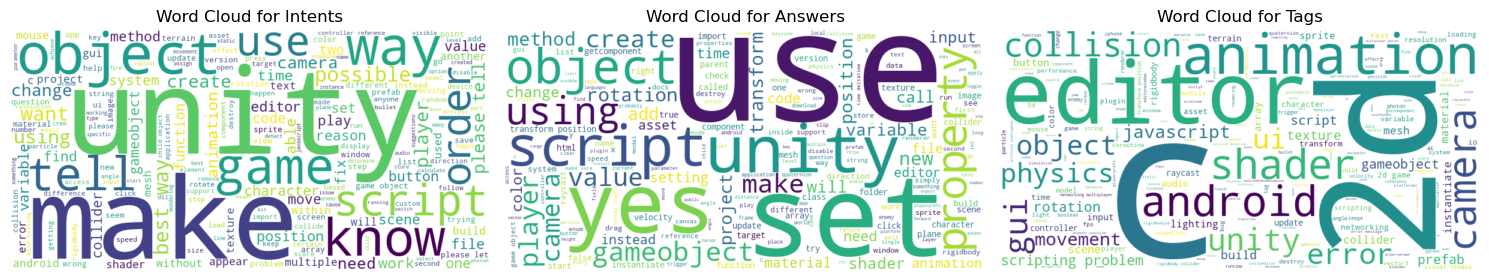

In [30]:
from wordcloud import WordCloud

# Create word clouds for 'intents' and 'answer' columns
wordcloud_intents = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_exploded['question']))
wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_exploded['answer']))

# Create word cloud for 'tags' column
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_exploded['tags']))

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_intents, interpolation='bilinear')
plt.title('Word Cloud for Intents')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_answers, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.title('Word Cloud for Tags')
plt.axis('off')

plt.tight_layout()
plt.show()


# Plotting length of questions and answers

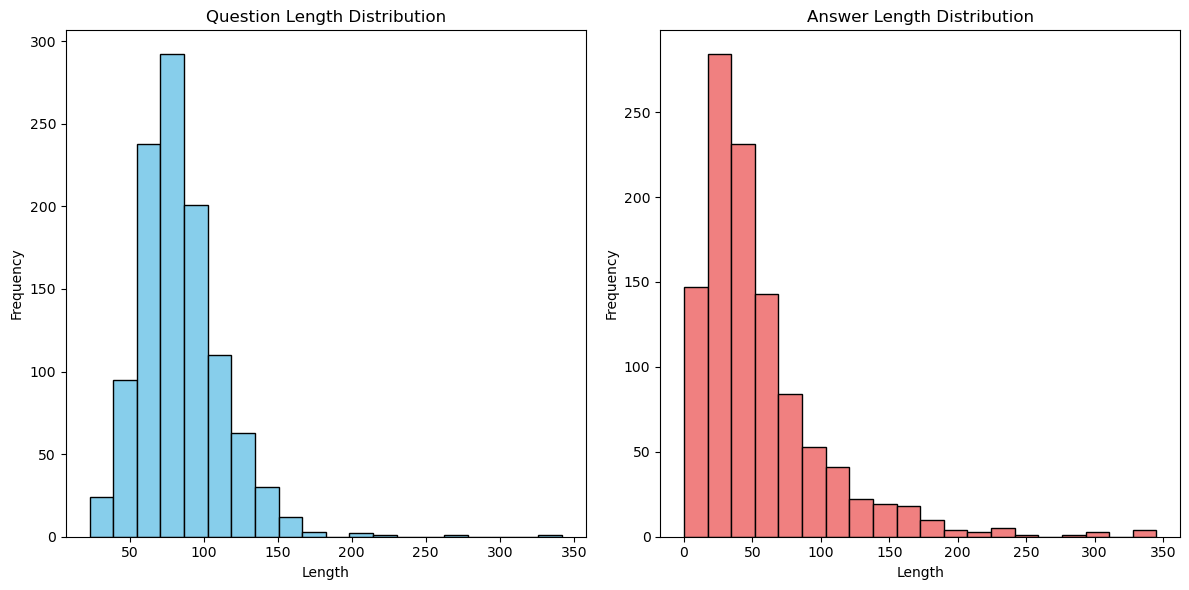

In [31]:
# Calculate lengths of intents and answers
df_exploded['question_length'] = df_exploded['question'].apply(len)
df_exploded['answer_length'] = df_exploded['answer'].apply(len)

# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_exploded['question_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_exploded['answer_length'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# Data Preprocessing for feeding into model

In [32]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download WordNet resource
nltk.download('omw-1.4')

def preprocessing_pipeline(text: str) -> str:
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove redundant spaces
    return text.strip()

# Apply preprocessing to 'tags' and 'question' columns
df_exploded['tags'] = df_exploded['tags'].apply(preprocessing_pipeline)
df_exploded['question'] = df_exploded['question'].apply(preprocessing_pipeline)

# NLTK Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()
df_exploded['question'] = df_exploded['question'].apply(lambda text: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(text)]))

df_exploded.head()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tags,answer,question,question_length,answer_length
1541,"raycasting,layermask,guiwindow",make multiple gui elements.,it is possible to make more than one informati...,108,27
10552,c#,add a script tag to your page.,how can i integrate discord rich presence into...,55,30
111,"car,control",try lowering torque property of the car.,in order to make my car accelerate more gradua...,65,40
10395,"mesh,procedural mesh,mesh vertices",the vertices are not perfectly aligned,is there a reason why my lighting is uneven wh...,71,38
4290,animation,use the [animation events](http://docs..com/do...,what do you need to do in order for unity to k...,83,162


In [34]:
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.utils.validation import check_is_fitted

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd


# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Preprocess text and get BERT embeddings
def get_bert_embeddings(text):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    with torch.no_grad():
        inputs = torch.tensor(tokens).unsqueeze(0)
        outputs = model(inputs)[0]
    embeddings = outputs.mean(dim=1).numpy()
    return embeddings



# Apply BERT embeddings
df_exploded['embeddings'] = df_exploded['question'].apply(get_bert_embeddings)

# Print embeddings for preview
print(df_exploded[['question', 'embeddings']])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
